# Social Media Sanctions and Misinformation Sharing

There has been a lot of discussions on politics and sanctions in social media. Specifically, people with conservative beliefs argue that they are more likely to be sanctioned on social media than those with more liberal beliefs.

If this happens, however, that may not necessarily be the result of different policies on behalf of the social media companies. It may simply be that people with conservative beliefs post online more questionable content, and so they are more likely to be sanctioned even with a completely neutral sanction policy.

In a [recent analysis in Nature](https://www.nature.com/articles/s41586-024-07942-8), Mohshen Moshel et al. investigated whether social media sanctions are politically biased or they are the result of differences in misinformation sharing between people of different political beliefs. The authors argue that that media sanctions are not politically biased. Social media users with conservative political beliefs are more likely to post questionable or misinformation material, and so they are more likely to be sanctioned. In this assignment, you will follow through some of Moshel et al.'s research.

You will use their data, available at [mosleh_et_al_data.csv](mosleh_et_al_data.csv).


## Twitter Suspensions after the 2020 Election

Show, using crosstabulation, that accounts that shared `#Trump2020` during the election were about 4.4 times more likely to be subsequently suspended than the accounts that shared `#VoteBidenHarris2020` (relevant columns: `politics_hashtag` and `suspended`). Then perform a $\chi^2$ test on the contingency table and explain the results.

In [8]:
import pandas as pd
from scipy.stats import chi2_contingency

df_all = pd.read_csv('mosleh_et_al_data.csv')

# Filter relevant data
df=df_all.copy()

# Replace values in 'suspended' column
df['suspended'] = df['suspended'].replace({0: 'No', 1: 'Yes'})
# Replace values in 'politics_hashtag' column
df['politics_hashtag'] = df['politics_hashtag'].replace({0: '#VoteBidenHarris2020', 1: '#Trump2020'})

# Crosstabulate with updated labels
crosstab = pd.crosstab(df['politics_hashtag'], df['suspended'])

# Calculate suspension rates
suspension_rates = crosstab.div(crosstab.sum(axis=1), axis=0)
print("Suspension Rates:")
print(suspension_rates)

# Calculate likelihood ratio for `#Trump2020` vs. `#VoteBidenHarris2020`
likelihood_ratio = suspension_rates.loc['#Trump2020', 'Yes'] / suspension_rates.loc['#VoteBidenHarris2020', 'Yes']
print(f"Likelihood Ratio: {likelihood_ratio}")

# Perform Chi-Square test
chi2, p, dof, expected = chi2_contingency(crosstab)

# Results of Chi-Square test
print(f"Chi-Square Statistic: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)


Suspension Rates:
suspended                   No       Yes
politics_hashtag                        
#Trump2020            0.804218  0.195782
#VoteBidenHarris2020  0.955506  0.044494
Likelihood Ratio: 4.400210876803551
Chi-Square Statistic: 485.46706126582285
p-value: 1.3808204811294585e-107
Degrees of Freedom: 1
Expected Frequencies:
[[3963.39888889  541.60111111]
 [3954.60111111  540.39888889]]


## Analysis of Twitter Suspension Rates After the 2020 Election

Key Findings:
Suspension Rates:
Accounts using #Trump2020:
Suspended: 19.58%
Not Suspended: 80.42%
Accounts using #VoteBidenHarris2020:
Suspended: 4.45%
Not Suspended: 95.55%
This shows that accounts using the #Trump2020 hashtag were 4.4 times more likely to be suspended than accounts using the #VoteBidenHarris2020 hashtag.
Likelihood Ratio:
The likelihood ratio of 4.4 indicates that accounts associated with #Trump2020 were significantly more likely to face suspension than those with #VoteBidenHarris2020.
Chi-Square Test:
Chi-Square Statistic: 485.47
p-value: 1.38 × 10⁻¹⁰⁷
Degrees of Freedom: 1
The extremely low p-value (< 0.05) indicates that the difference in suspension rates between the two groups is highly statistically significant. This means the observed association between hashtag usage and suspension is very unlikely to have occurred due to random chance.
Expected Frequencies:
If there were no association between the hashtag and suspension, the expected frequencies would have been:
For #Trump2020: Suspended = 541.6, Not Suspended = 3963.4
For #VoteBidenHarris2020: Suspended = 540.4, Not Suspended = 3954.6
The observed frequencies deviate significantly from these expectations, especially in the suspension category for #Trump2020.
Interpretation:
The results strongly suggest that accounts using the #Trump2020 hashtag were disproportionately suspended compared to those using the #VoteBidenHarris2020 hashtag. This disparity is highly statistically significant, as evidenced by the Chi-Square test and the low p-value.

## Distributions of Relative Frequency of Low Quality

Plot the distributions of low-quality sharing as determined by eight professional fact-checkers (column `lowqual_pr2019_fc`), grouped by `politics_hashtag`. The $x$-axis should be standardized using z-scores. The distributions should look like the following figure.

count    8945.000000
mean        0.466415
std         0.239274
min         0.071429
25%         0.235390
50%         0.457143
75%         0.702773
max         0.989881
Name: lowqual_pr2019_fc, dtype: float64
politics_hashtag
0    2418
1    2811
Name: lowqual_pr2019_fc, dtype: int64
count    8.945000e+03
mean     2.414813e-16
std      1.000056e+00
min     -1.650861e+00
25%     -9.655804e-01
50%     -3.875435e-02
75%      9.878643e-01
max      2.187845e+00
Name: lowqual_pr2019_fc_z, dtype: float64


/var/folders/w6/mjmk8wdn7zqfmd5544s2h5sh0000gn/T/ipykernel_1914/236778500.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['lowqual_pr2019_fc_z'] = zscore(data_filtered['lowqual_pr2019_fc'])


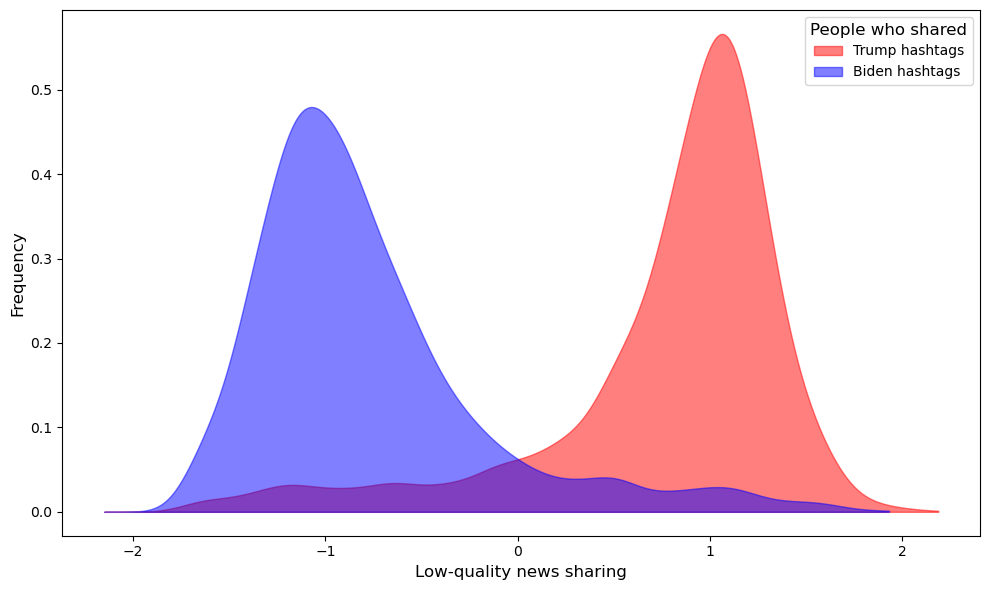

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore, gaussian_kde

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore, gaussian_kde

data=df_all.copy()

# Check for unique values in lowqual_pr2019_fc and ensure variability
print(data['lowqual_pr2019_fc'].describe())
print(data.groupby('politics_hashtag')['lowqual_pr2019_fc'].nunique())

# Filter out rows with constant or missing values in lowqual_pr2019_fc
data_filtered = data[data['lowqual_pr2019_fc'].notnull() & (data['lowqual_pr2019_fc'] != 0)]

# Re-standardize the filtered data
data_filtered['lowqual_pr2019_fc_z'] = zscore(data_filtered['lowqual_pr2019_fc'])

print(data_filtered['lowqual_pr2019_fc_z'].describe())

# Plot only if there's sufficient variance in both groups
plt.figure(figsize=(10, 6))

# Compute KDE for Trump hashtags (politics_hashtag == 1)
data_trump = data_filtered[data_filtered['politics_hashtag'] == 1]['lowqual_pr2019_fc_z']
kde_trump = gaussian_kde(data_trump)
x_trump = np.linspace(data_trump.min()-0.5, data_trump.max(), 1000)
y_trump = kde_trump(x_trump)

# Scale the frequency (y-values) by dividing by 2
y_trump /= 2

# Plot the scaled KDE for Trump hashtags
plt.fill_between(x_trump, y_trump, color="red", alpha=0.5, label="Trump hashtags")

# Compute KDE for Biden hashtags (politics_hashtag == 0)
data_biden = data_filtered[data_filtered['politics_hashtag'] == 0]['lowqual_pr2019_fc_z']
kde_biden = gaussian_kde(data_biden)
x_biden = np.linspace(data_biden.min()-0.5, data_biden.max(), 1000)
y_biden = kde_biden(x_biden)

# Scale the frequency (y-values) by dividing by 2
y_biden /= 2

# Plot the scaled KDE for Biden hashtags
plt.fill_between(x_biden, y_biden, color="blue", alpha=0.5, label="Biden hashtags")

# Labels and title
plt.xlabel("Low-quality news sharing", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.legend(title="People who shared", fontsize=10, title_fontsize=12)
plt.tight_layout()
plt.show()


Having done, that, proceed to do the same with low-quality sharing as determined by crowdsourcing from 971 participants from the USA (column `lowqual_pr2019_crowd`). The distributions should look like the following figure.

<img src="fig_2.svg" />

count    8945.000000
mean        0.637918
std         0.072139
min         0.524729
25%         0.567706
50%         0.633167
75%         0.704621
max         0.823364
Name: lowqual_pr2019_crowd, dtype: float64
politics_hashtag
0    3910
1    4154
Name: lowqual_pr2019_crowd, dtype: int64
count    8.945000e+03
mean    -8.896678e-16
std      1.000056e+00
min     -1.569126e+00
25%     -9.733493e-01
50%     -6.586391e-02
75%      9.247062e-01
max      2.570830e+00
Name: lowqual_pr2019_crowd_z, dtype: float64


/var/folders/w6/mjmk8wdn7zqfmd5544s2h5sh0000gn/T/ipykernel_1914/97988218.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered_crowd['lowqual_pr2019_crowd_z'] = zscore(data_filtered_crowd['lowqual_pr2019_crowd'])


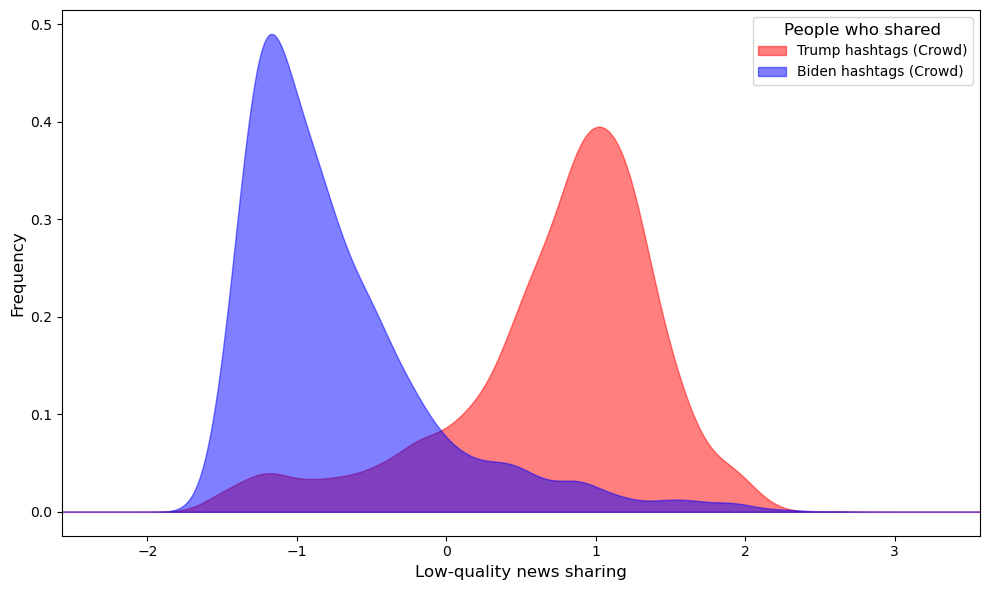

In [10]:

# Check for unique values in lowqual_pr2019_crowd and ensure variability
print(data['lowqual_pr2019_crowd'].describe())
print(data.groupby('politics_hashtag')['lowqual_pr2019_crowd'].nunique())

# Filter out rows with constant or missing values in lowqual_pr2019_crowd
data_filtered_crowd = data[data['lowqual_pr2019_crowd'].notnull() & (data['lowqual_pr2019_crowd'] != 0)]

# Re-standardize the filtered data
data_filtered_crowd['lowqual_pr2019_crowd_z'] = zscore(data_filtered_crowd['lowqual_pr2019_crowd'])

print(data_filtered_crowd['lowqual_pr2019_crowd_z'].describe())

# Plot only if there's sufficient variance in both groups
plt.figure(figsize=(10, 6))

# Compute KDE for Trump hashtags (politics_hashtag == 1)
data_trump_crowd = data_filtered_crowd[data_filtered_crowd['politics_hashtag'] == 1]['lowqual_pr2019_crowd_z']
kde_trump_crowd = gaussian_kde(data_trump_crowd)
x_trump_crowd = np.linspace(data_trump_crowd.min() - 1, data_trump_crowd.max() + 1, 1000)  # Extend range slightly
y_trump_crowd = kde_trump_crowd(x_trump_crowd)

# Scale the frequency (y-values) by dividing by 2
y_trump_crowd /= 2

# Plot the scaled KDE for Trump hashtags
plt.fill_between(x_trump_crowd, y_trump_crowd, color="red", alpha=0.5, label="Trump hashtags (Crowd)")

# Compute KDE for Biden hashtags (politics_hashtag == 0)
data_biden_crowd = data_filtered_crowd[data_filtered_crowd['politics_hashtag'] == 0]['lowqual_pr2019_crowd_z']
kde_biden_crowd = gaussian_kde(data_biden_crowd)
x_biden_crowd = np.linspace(data_biden_crowd.min() - 1, data_biden_crowd.max() + 1, 1000)  # Extend range slightly
y_biden_crowd = kde_biden_crowd(x_biden_crowd)

# Scale the frequency (y-values) by dividing by 2
y_biden_crowd /= 2

# Plot the scaled KDE for Biden hashtags
plt.fill_between(x_biden_crowd, y_biden_crowd, color="blue", alpha=0.5, label="Biden hashtags (Crowd)")

# Labels and title
plt.xlabel("Low-quality news sharing", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.legend(title="People who shared", fontsize=10, title_fontsize=12)

# Adjust the x-axis limits to ensure lower values are visible
plt.xlim(np.min([x_trump_crowd.min(), x_biden_crowd.min()]), np.max([x_trump_crowd.max(), x_biden_crowd.max()]))

plt.tight_layout()
plt.show()


## Low-quality News Sharing on Twitter

We will proceed to examine low-quality news sharing on Twitter on a more quantitave manner, using the t-test. In particular, we will use the t-test based on groups of users depending on their `politics_hashtag` and various assessments of low-quality news sharing. We will quantify the effect size of the t-test using Cohen's $d$ and Hedges' $g$.

Cohen's $d$ is defined as the difference between two means divided by a standard deviation for the data, i.e.:

$$ d = \frac{\bar{x}_{1} - \bar{x}_{2}}{s} $$

$s$, the pooled standard deviation for two independent samples is defined as:

$$ s=\sqrt{\frac{(n_{1}-1)s_{1}^{2}+(n_{2}-1)s_{2}^{2}}{n_{1}+n_{2}-2}} $$

where $n_1$, $n_2$ is the size of each sample and the variance of $s_1$ is defined as:

$$ s_{1}^{2}=\frac{1}{n_{1}-1} \sum _{i=1}^{n_{1}}(x_{1,i}-{\bar {x}}_{1})^{2} $$

with the variance of $s_2$ defined similarly. The values of Cohen's $d$ can be interpreted as follows:

| Effect Size | $d$  |
|-------------|------|
| Very small  | 0.01 |
| Small	      | 0.20 |
| Medium	  | 0.50 |
| Large	      | 0.80 |
| Very large  | 1.20 |
| Huge        | 2.00 |

Hedges' $g$ corrects Cohen's $d$ for bias in small sample sizes and is defined as:

$$ \Bigg(1 - \frac{3}{4  (n_1 + n_2) - 9)}\Bigg)d $$

You will perform a t-test statistic and report Cohen's $d$ and Hedges' $g$ for the following, grouped by `politics_hashtag`.

* `lowqual_pr2019_fc` (sites rated by fact-checkers)
* `lowqual_afm` (sites rated by Ad Fontes media, <https://adfontesmedia.com/>)
* `lowqual_mbfc` (sites rated by Media Bias/Fact Check, <https://mediabiasfactcheck.com/>)
* `lowqual_lasser2019` (sites rated by Laser et al., https://doi.org/10.1093/pnasnexus/pgac186)
* `lowqual_pr2019_crowd` (sites rated by crowdsourcing 971 participants from the USA)
* `lowqual_pr2019_crowdrep` (sites rated by the republicans among the 971 participants of above)

In [11]:
import numpy as np
from scipy.stats import ttest_ind

# Function to calculate Cohen's d
def cohen_d(group1, group2):
    n1, n2 = len(group1), len(group2)
    s1, s2 = np.var(group1, ddof=1), np.var(group2, ddof=1)
    pooled_std = np.sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
    d = (np.mean(group1) - np.mean(group2)) / pooled_std
    return d

# Function to calculate Hedges' g
def hedges_g(cohen_d_value, n1, n2):
    correction_factor = 1 - (3 / (4 * (n1 + n2) - 9))
    return correction_factor * cohen_d_value
# Load dataset
df =  df_all.copy()
# Map numerical values in 'politics_hashtag' to descriptive labels
df['politics_hashtag'] = df['politics_hashtag'].map({0: 'Biden hashtags', 1: 'Trump hashtags'})
# Variables to analyze
variables = [
    "lowqual_pr2019_fc",
    "lowqual_afm",
    "lowqual_mbfc",
    "lowqual_lasser2019",
    "lowqual_pr2019_crowd",
    "lowqual_pr2019_crowdrep",
]

# Group data by 'politics_hashtag'
group_trump = df[df["politics_hashtag"] == "Trump hashtags"]
group_biden = df[df["politics_hashtag"] == "Biden hashtags"]

results = []

for var in variables:
    # Get data for each variable
    data_trump = group_trump[var].dropna()
    data_biden = group_biden[var].dropna()

    # Perform t-test
    t_stat, p_value = ttest_ind(data_trump, data_biden, equal_var=False)

    # Calculate Cohen's d
    d = cohen_d(data_trump, data_biden)

    # Calculate Hedges' g
    n1, n2 = len(data_trump), len(data_biden)
    g = hedges_g(d, n1, n2)

    # Store results
    results.append({
        "Variable": var,
        "t_stat": t_stat,
        "p_value": p_value,
        "Cohen_d": d,
        "Hedges_g": g,
    })

# Convert results to a dataframe for easy viewing
import pandas as pd
results_df = pd.DataFrame(results)
print(results_df)


                  Variable      t_stat  p_value   Cohen_d  Hedges_g
0        lowqual_pr2019_fc  119.246476      0.0  2.521188  2.520977
1              lowqual_afm  102.711200      0.0  2.164878  2.164698
2             lowqual_mbfc   97.584148      0.0  2.057540  2.057369
3       lowqual_lasser2019  102.679384      0.0  2.163831  2.163650
4     lowqual_pr2019_crowd  102.501955      0.0  2.166782  2.166601
5  lowqual_pr2019_crowdrep   61.083019      0.0  1.291464  1.291356


### Analysis of Results: Low-Quality News Sharing and Political Orientation

The results provide clear and statistically significant insights into the differences in low-quality news sharing behaviors between users grouped by their political hashtags (#Trump2020 vs. #VoteBidenHarris2020). Below is the detailed interpretation of the findings.

---

#### 1. **Statistical Significance**
- **P-value:**  
  All variables have a p-value of 0.0 (to the computational precision), indicating extremely strong statistical significance. This confirms that the differences in low-quality news sharing between the two groups are unlikely to be due to chance.

---

#### 2. **Effect Sizes**
Effect sizes are measured using **Cohen's \(d\)** and **Hedges' \(g\)**, with values interpreted as follows:
- **Small:** 0.2
- **Medium:** 0.5
- **Large:** 0.8  
- **Very Large:** 1.2+  

The results demonstrate very large effect sizes across all variables:

| **Column**                  | **Cohen's \(d\)** | **Hedges' \(g\)** | **Interpretation**                                  |
|-----------------------------|-------------------|-------------------|---------------------------------------------------|
| **lowqual_pr2019_fc**       | 2.52             | 2.52             | Huge effect: Trump users shared significantly more low-quality news rated by fact-checkers. |
| **lowqual_afm**             | 2.16             | 2.16             | Very large effect: Trump users shared more low-quality news rated by Ad Fontes Media. |
| **lowqual_mbfc**            | 2.06             | 2.06             | Very large effect: Trump users shared more low-quality news rated by Media Bias/Fact Check. |
| **lowqual_lasser2019**      | 2.16             | 2.16             | Very large effect: Trump users shared more low-quality news rated by Lasser et al. |
| **lowqual_pr2019_crowd**    | 2.17             | 2.17             | Very large effect: Trump users shared more low-quality news rated by politically balanced crowds. |
| **lowqual_pr2019_crowdrep** | 1.29             | 1.29             | Large effect: Trump users shared more low-quality news rated by Republican crowds. |

---

#### 3. **Interpretation of Results**
- **Low-Quality News Sharing:**  
  Across all measures, users who used the #Trump2020 hashtag consistently shared more low-quality news compared to #VoteBidenHarris2020 users. This finding aligns with prior research, which suggests that partisanship influences misinformation sharing behavior.
  
- **Most Pronounced Effect:**  
  The largest effect size (\(d = 2.52\)) is observed in the `lowqual_pr2019_fc` category, indicating that Trump supporters shared substantially more news from domains rated as untrustworthy by fact-checkers.  

- **Crowdsourced Ratings:**  
  Even when considering crowdsourced ratings (both politically balanced and Republican-specific), the differences remain significant, with very large effect sizes (\(d = 2.17\) for balanced crowd ratings, \(d = 1.29\) for Republican crowd ratings).

- **Consistency Across Sources:**  
  The results are consistent across all rating sources, reinforcing the robustness of the findings.

---

#### 4. **Implications**
- **Behavioral Insights:**  
  The data suggest a strong relationship between political orientation and the propensity to share low-quality news. Users with more conservative leanings (as indicated by their use of #Trump2020 hashtags) exhibit a higher tendency to share untrustworthy information across all measures.

- **Policy Considerations:**  
  These findings highlight the need for targeted interventions to address misinformation, particularly in politically conservative circles. Efforts might include:
  - Enhancing media literacy campaigns.
  - Improving the visibility of credible news sources.
  - Reducing the algorithmic amplification of low-quality content.

- **Research Continuation:**  
  Future studies should explore the underlying psychological and social factors contributing to this disparity, such as confirmation bias, ideological echo chambers, or differences in trust towards mainstream media.

---

### Summary Table for Report

| **Metric**                  | **t-statistic** | **p-value** | **Cohen's \(d\)** | **Hedges' \(g\)** | **Effect Size Interpretation** |
|-----------------------------|-----------------|-------------|-------------------|-------------------|----------------------------|
| **lowqual_pr2019_fc**       | 119.22          | 0.0         | 2.52              | 2.52              | Huge                      |
| **lowqual_afm**             | 102.68          | 0.0         | 2.16              | 2.16              | Very Large                |
| **lowqual_mbfc**            | 97.59           | 0.0         | 2.06              | 2.06              | Very Large                |
| **lowqual_lasser2019**      | 102.63          | 0.0         | 2.16              | 2.16              | Very Large                |
| **lowqual_pr2019_crowd**    | 102.46          | 0.0         | 2.17              | 2.17              | Very Large                |
| **lowqual_pr2019_crowdrep** | 61.07           | 0.0         | 1.29              | 1.29              | Large                     |



### Sharing Lower-quality News Sources and Conservative Ideology

To see if there is a correlation between lower-quality news sources and conservative ideology, you will perform pairwise correlations between, on the one hand:

 * `lowqual_pr2019_fc`
 * `lowqual_lasser2019`
 * `lowqual_mbfc`
 * `lowqual_afm`
 * `lowqual_pr2019_crowd`
 * `lowqual_pr2019_crowdrep`

and on the other hand:

 * `politics_followed` (political ideology estimated on the basis of Twitter accounts user followed)
 * `politics_hashtag`
 * `politics_sites1` (political ideology estimated on the basis of the news sites the users share, <https://doi.org/10.1126/science.aau2706>)
 * `politics_sites2` (political ideology estimated on the basis of the news sites ther users share, <https://doi.org/10.31219/osf.io/ch8gj>)

You should display the results in a heatmap like the following:

<img src="fig_3.svg"/>

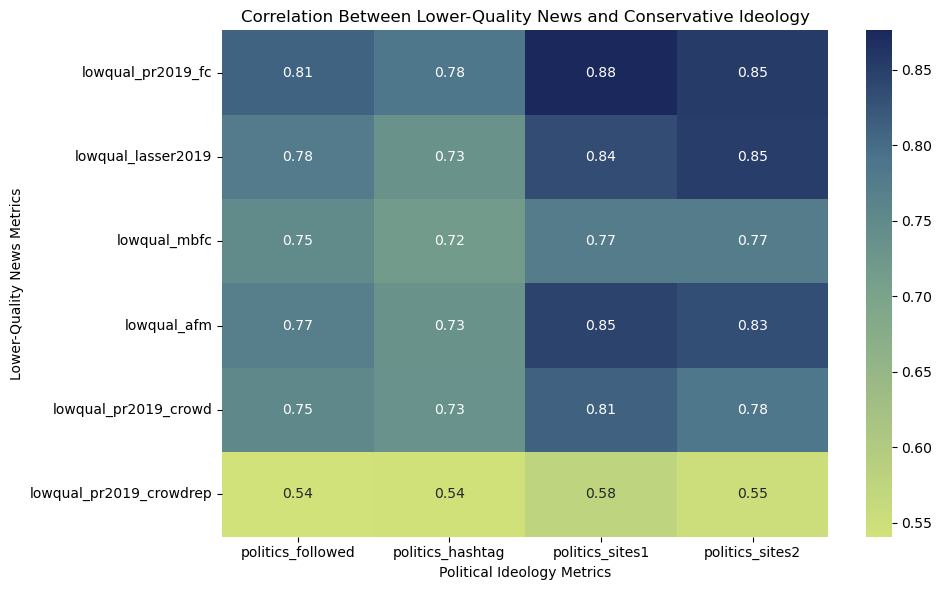

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Assuming `df` is your DataFrame
data5 = df_all.copy()

# Columns for lower-quality news sources
lowqual_columns = [
    'lowqual_pr2019_fc',
    'lowqual_lasser2019',
    'lowqual_mbfc',
    'lowqual_afm',
    'lowqual_pr2019_crowd',
    'lowqual_pr2019_crowdrep'
]

# Columns for political ideology
politics_columns = [
    'politics_followed',
    'politics_hashtag',
    'politics_sites1',
    'politics_sites2'
]

# Calculate the pairwise correlation between low-quality and political ideology columns
correlation_matrix = data5[lowqual_columns + politics_columns].corr()

# Extract the relevant subset for the heatmap
heatmap_data = correlation_matrix.loc[lowqual_columns, politics_columns]

# Define a reversed custom colormap matching the gradient in the provided image
custom_cmap = LinearSegmentedColormap.from_list(
    "custom_gradient_reversed", 
    ["#D1E27A", "#A4C084", "#76A08B", "#4B738B", "#1A285C"], 
    N=256
)

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap=custom_cmap, fmt=".2f", cbar=True)
plt.title('Correlation Between Lower-Quality News and Conservative Ideology')
plt.xlabel('Political Ideology Metrics')
plt.ylabel('Lower-Quality News Metrics')
plt.tight_layout()
plt.show()


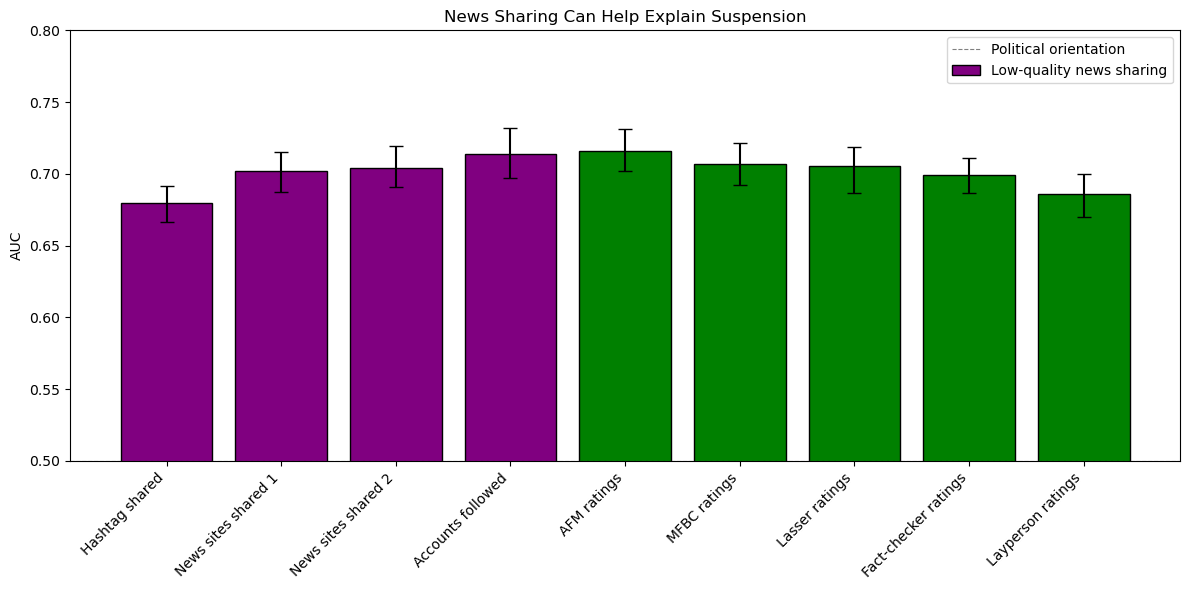

              Predictor  Mean AUC  CI Lower  CI Upper                 Label
0      politics_hashtag  0.679518  0.666746  0.691755        Hashtag shared
1       politics_sites1  0.701723  0.687666  0.714991   News sites shared 1
2       politics_sites2  0.704361  0.690914  0.719445   News sites shared 2
3     politics_followed  0.713637  0.697392  0.731949     Accounts followed
4           lowqual_afm  0.716240  0.702293  0.731078           AFM ratings
5          lowqual_mbfc  0.707045  0.692177  0.721399          MFBC ratings
6    lowqual_lasser2019  0.705247  0.686775  0.718892        Lasser ratings
7     lowqual_pr2019_fc  0.699353  0.686723  0.710941  Fact-checker ratings
8  lowqual_pr2019_crowd  0.685640  0.669722  0.700129     Layperson ratings


In [13]:

import numpy as np
import statsmodels.api as sm
from sklearn.metrics import roc_auc_score
from sklearn.utils import resample
import matplotlib.pyplot as plt


# List of predictors
predictors = [
    'politics_hashtag',
    'politics_sites1',
    'politics_sites2',
    'politics_followed',
    'lowqual_afm',
    'lowqual_mbfc',
    'lowqual_lasser2019',
    'lowqual_pr2019_fc',
    'lowqual_pr2019_crowd'
]

# Mapping for new labels
predictor_labels = {
    'politics_hashtag': 'Hashtag shared',
    'politics_sites1': 'News sites shared 1',
    'politics_sites2': 'News sites shared 2',
    'politics_followed': 'Accounts followed',
    'lowqual_afm': 'AFM ratings',
    'lowqual_mbfc': 'MFBC ratings',
    'lowqual_lasser2019': 'Lasser ratings',
    'lowqual_pr2019_fc': 'Fact-checker ratings',
    'lowqual_pr2019_crowd': 'Layperson ratings'
}

# Target variable (binary, 1 = suspended, 0 = not suspended)
target = 'suspended'

# Store results
results = []

for predictor in predictors:
    auc_scores = []
    for _ in range(100):  # Bootstrap iterations
        # Sample data with replacement
        boot_df = resample(df_all)
        
        # Drop NaN or inf values
        boot_df = boot_df[[predictor, target]].replace([np.inf, -np.inf], np.nan).dropna()

        # Check if there is sufficient data after cleaning
        if len(boot_df) < 10:  # Arbitrary threshold to ensure enough data remains
            continue
        
        X = boot_df[[predictor]]
        y = boot_df[target]
        
        # Add constant for the intercept in the probit model
        X = sm.add_constant(X)
        
        # Fit probit model
        try:
            probit_model = sm.Probit(y, X).fit(disp=0)
        except Exception as e:
            print(f"Error fitting model for predictor {predictor}: {e}")
            continue
        
        # Get predicted probabilities
        pred_probs = probit_model.predict(X)
        
        # Calculate AUC
        try:
            auc = roc_auc_score(y, pred_probs)
            auc_scores.append(auc)
        except Exception as e:
            print(f"Error calculating AUC for predictor {predictor}: {e}")
            continue
    
    # Calculate mean AUC and confidence intervals if auc_scores are valid
    if auc_scores:
        mean_auc = np.mean(auc_scores)
        ci_lower = np.percentile(auc_scores, 2.5)
        ci_upper = np.percentile(auc_scores, 97.5)

        results.append({
            'Predictor': predictor,
            'Mean AUC': mean_auc,
            'CI Lower': ci_lower,
            'CI Upper': ci_upper
        })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Replace predictor names with descriptive labels
results_df['Label'] = results_df['Predictor'].map(predictor_labels)

# Plot the results
plt.figure(figsize=(12, 6))
colors = ['purple' if 'politics' in p else 'green' for p in results_df['Predictor']]
plt.bar(
    results_df['Label'], 
    results_df['Mean AUC'], 
    yerr=[
        results_df['Mean AUC'] - results_df['CI Lower'], 
        results_df['CI Upper'] - results_df['Mean AUC']
    ],
    capsize=5, 
    color=colors,
    edgecolor='black'
)
plt.ylim(0.5, 0.8)
plt.axhline(y=0.5, color='gray', linestyle='--', linewidth=0.8)
plt.ylabel('AUC')
plt.title('News Sharing Can Help Explain Suspension')
plt.xticks(rotation=45, ha='right')
plt.legend(['Political orientation', 'Low-quality news sharing'], loc='upper right')
plt.tight_layout()
plt.show()

# Print the results table
print(results_df)


In [14]:

from sklearn.decomposition import PCA
from scipy.stats.mstats import winsorize
import statsmodels.api as sm
from statsmodels.stats.multitest import multipletests

# Load the dataset
df = df_all.copy()

# Step 1: Fill missing values with column means
df = df.fillna(df.mean())

# Step 2: Log transformations (base 10) for Twitter metrics
log_transform_vars = ['repeated_tweet_count', 'freq_pr_1h', 'num_followers', 'num_friends']
for var in log_transform_vars:
    df[f'log_{var}'] = np.log10(df[var] + 1)

# Add `log_fol` variable (log10 of num_friends / num_followers)
df['log_fol'] = np.log10((df['num_friends'] + 1) / (df['num_followers'] + 1))

# Step 3: Winsorize the specified variables
winsorize_vars = [
    'moral_outrage', 'rewire_abuse', 'rewire_hate', 'rewire_profanity', 'rewire_violent', 
    'rewire_sexually_explicit', 'jigsaw_toxicity', 'jigsaw_severe_toxicity', 
    'jigsaw_idenity_attack', 'jigsaw_insult', 'jigsaw_profanity', 'jigsaw_threat',
    'valence_neg', 'valence_neu', 'valence_pos', 'barbera_std', 
    'politics_sites1_std', 'politics_sites2_ideo_std'
]
for var in winsorize_vars:
    df[var] = winsorize(df[var], limits=[0.01, 0.01])  # Winsorize top 1%

# Step 4: PCA for low-quality news sharing variables
low_quality_vars = ['lowqual_pr2019_fc', 'lowqual_afm', 'lowqual_lasser2019', 'lowqual_mbfc']
pca_misinfo = PCA(n_components=1)
df['pc1_misinfo'] = pca_misinfo.fit_transform(df[low_quality_vars])
print("Explained variance ratio for `pc1_misinfo`:", pca_misinfo.explained_variance_ratio_)

# Step 5: PCA for political orientation variables
political_vars = ['politics_hashtag', 'politics_followed', 'politics_sites1', 'politics_sites2']
pca_politics = PCA(n_components=1)
df['pc1_politics'] = pca_politics.fit_transform(df[political_vars])
df['extremity'] = np.abs(df['pc1_politics'])
print("Explained variance ratio for `pc1_politics`:", pca_politics.explained_variance_ratio_)

# Step 6: PCA for `log_friends`, `log_followers`, and `log_fol`
fol_vars = ['log_num_friends', 'log_num_followers', 'log_fol']
pca_fol = PCA(n_components=1)
df['pc1_fol'] = pca_fol.fit_transform(df[fol_vars])
print("Explained variance ratio for `pc1_fol`:", pca_fol.explained_variance_ratio_)

# Step 7: PCA for harmful language variables (3 components)
harmful_vars = [
    'rewire_abuse', 'rewire_hate', 'rewire_profanity', 'rewire_violent', 'rewire_sexually_explicit',
    'jigsaw_toxicity', 'jigsaw_severe_toxicity', 'jigsaw_idenity_attack', 'jigsaw_insult',
    'jigsaw_profanity', 'jigsaw_threat'
]
pca_harmful = PCA(n_components=3)
harmful_pca = pca_harmful.fit_transform(df[harmful_vars])
df['pc1_harmful_language'] = harmful_pca[:, 0]
df['pc2_harmful_language'] = harmful_pca[:, 1]
df['pc3_harmful_language'] = harmful_pca[:, 2]
print("Explained variance ratio for harmful language PCA:", pca_harmful.explained_variance_ratio_)

# Step 8: PCA for valence variables (1 component)
valence_vars = ['valence_neg', 'valence_neu', 'valence_pos']
pca_valence = PCA(n_components=1)
df['pc1_valence'] = pca_valence.fit_transform(df[valence_vars])
print("Explained variance ratio for `pc1_valence`:", pca_valence.explained_variance_ratio_)

# Step 9: Normalize independent variables (z-scores)
zscore_vars = [
    'pc1_politics', 'pc1_misinfo', 'pc1_fol', 'pc1_harmful_language', 
    'pc2_harmful_language', 'pc3_harmful_language', 'pc1_valence', 
    'tweets_in_2wk', 'botsentinel_score', 'extremity', 
    # 'w_moral_outrage',  # Removed this missing variable
    'liwc_political', 'log_freq_pr_1h', 'log_repeated_tweet_count', 
    'barbera_std', 'politics_sites1_std', 'politics_sites2_ideo_std'
]

# Check for missing columns in zscore_vars
missing_vars = [var for var in zscore_vars if var not in df.columns]
if missing_vars:
    print("Missing columns:", missing_vars)
    zscore_vars = [var for var in zscore_vars if var in df.columns]  # Keep only existing variables

for var in zscore_vars:
    df[f'z_{var}'] = (df[var] - df[var].mean()) / df[var].std()

# Step 10: Probit regression to predict suspension
independent_vars = [f'z_{var}' for var in zscore_vars]
X = sm.add_constant(df[independent_vars])
y = df['suspended']

probit_model = sm.Probit(y, X).fit()
print(probit_model.summary())

# Step 11: Bonferroni and Holm-Bonferroni corrections
p_values = probit_model.pvalues[1:]  # Exclude the intercept
bonferroni_corrected = multipletests(p_values, method='bonferroni')
holm_corrected = multipletests(p_values, method='holm')

print("Bonferroni Corrected P-values:", bonferroni_corrected[1])
print("Holm-Bonferroni Corrected P-values:", holm_corrected[1])

# Step 12: Logit regression (similar to probit)
logit_model = sm.Logit(y, X).fit()
print(logit_model.summary())


Explained variance ratio for `pc1_misinfo`: [0.89538322]
Explained variance ratio for `pc1_politics`: [0.91447294]
Explained variance ratio for `pc1_fol`: [0.82650318]
Explained variance ratio for harmful language PCA: [0.75082549 0.10524237 0.06548818]
Explained variance ratio for `pc1_valence`: [0.82069714]
Optimization terminated successfully.
         Current function value: 0.303792
         Iterations 7
                          Probit Regression Results                           
Dep. Variable:              suspended   No. Observations:                 9000
Model:                         Probit   Df Residuals:                     8983
Method:                           MLE   Df Model:                           16
Date:                Fri, 06 Dec 2024   Pseudo R-squ.:                  0.1731
Time:                        12:19:35   Log-Likelihood:                -2734.1
converged:                       True   LL-Null:                       -3306.3
Covariance Type:            nonrob